## **Data and Libraries Import**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [3]:
data = pd.read_csv('/content/drive/My Drive/facial sentiment analysis/fer2013/fer2013/fer2013.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [5]:
data.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [6]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
data['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [8]:
## 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

In [9]:
data['emotion'].replace({0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}, inplace=True)

In [10]:
data.head()

,emotion,pixels,Usage
0,Angry,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,Angry,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,Fear,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,Sad,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,Neutral,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [11]:
data.tail()

,emotion,pixels,Usage
35882,Neutral,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,Happy,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,Angry,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,Happy,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,Fear,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [12]:
data['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [13]:
data['Usage'][28708]

'Training'

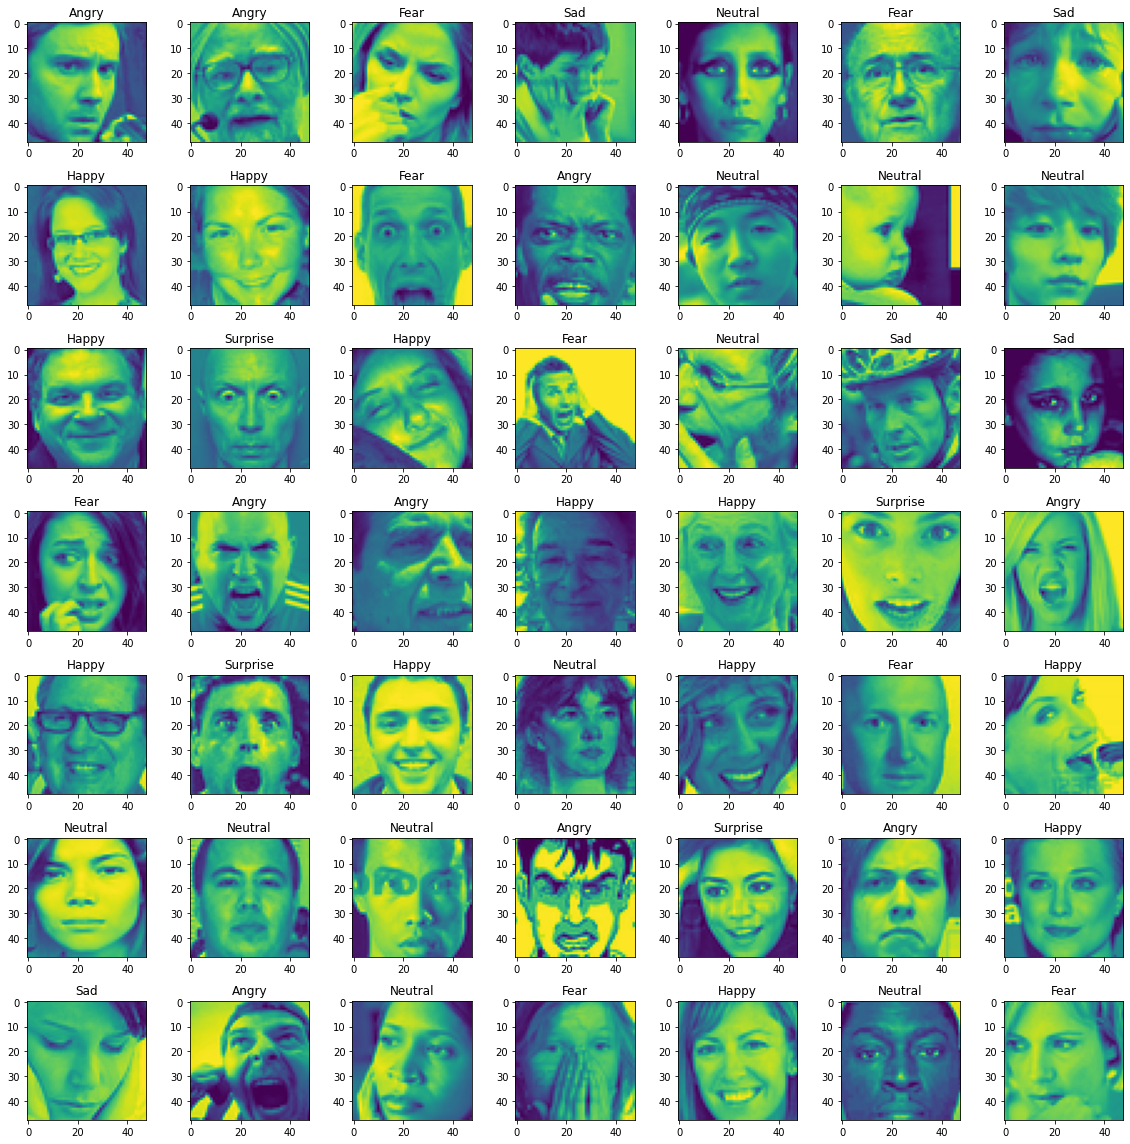

In [14]:
width=5
height=5
rows = 7
cols = 7

axes=[]
fig=plt.figure(figsize=(16,16))

for a in range(rows*cols):
    b = np.array(data['pixels'][a].split(' ')).reshape(48,48).astype('float32')
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(data['emotion'][a])
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)
fig.tight_layout()    
plt.show()

In [15]:
train_data = data[:][0:28709]

In [16]:
train_data.tail()

,emotion,pixels,Usage
28704,Fear,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28705,Angry,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28706,Sad,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28707,Angry,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training
28708,Sad,195 199 205 206 205 203 206 209 208 210 212 21...,Training


In [17]:
test_data = data[:][28709:]

In [18]:
test_data.head()

,emotion,pixels,Usage
28709,Angry,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
28710,Disgust,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
28711,Sad,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest
28712,Neutral,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
28713,Happy,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest


In [19]:
test_data.reset_index(inplace=True)

In [20]:
test_data.head()

,index,emotion,pixels,Usage
0,28709,Angry,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
1,28710,Disgust,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
2,28711,Sad,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest
3,28712,Neutral,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
4,28713,Happy,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest


In [21]:
test_data.drop(['index', 'Usage'], axis=1, inplace=True)
train_data.drop('Usage', axis=1, inplace=True)

## **Data Preprocessing**

In [22]:
train_data.shape

(28709, 2)

In [23]:
test_data.shape

(7178, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


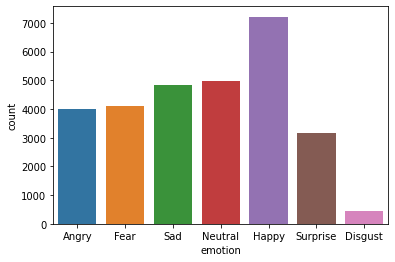

In [24]:
sns.countplot(train_data['emotion'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


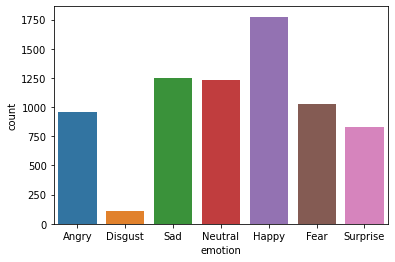

In [25]:
sns.countplot(test_data['emotion'])

In [26]:
## We are interested in classifying Happy, Sad, Neutral also sample containin a 'Happy' emotion is more than the other two.
## However, the case is similar in both test and train data so there should not be bias in model classification.

In [27]:
needed_sample_label = ['Sad', 'Neutral', 'Happy']

In [28]:
train = train_data[train_data['emotion'].isin(needed_sample_label)]

In [29]:
train

,emotion,pixels
3,Sad,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,Neutral,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
6,Sad,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,Happy,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,Happy,85 84 90 121 101 102 133 153 153 169 177 189 1...
...,...,...
28698,Happy,35 45 69 79 75 48 45 35 56 93 71 51 48 47 46 4...
28699,Neutral,128 134 164 94 70 114 159 138 75 47 89 127 134...
28700,Sad,11 10 12 13 9 11 10 11 11 10 10 13 11 10 11 10...
28706,Sad,74 81 87 89 95 100 98 93 105 120 127 133 146 1...


In [30]:
train.shape

(17010, 2)

In [31]:
test = test_data[test_data['emotion'].isin(needed_sample_label)]

In [32]:
test.shape

(4254, 2)

In [33]:
train.head()

,emotion,pixels
3,Sad,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,Neutral,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
6,Sad,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,Happy,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,Happy,85 84 90 121 101 102 133 153 153 169 177 189 1...


In [34]:
train['emotion'].value_counts()

Happy      7215
Neutral    4965
Sad        4830
Name: emotion, dtype: int64

In [35]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [36]:
train.drop('index', axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
test.drop('index', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
train.head()

,emotion,pixels
0,Sad,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
1,Neutral,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
2,Sad,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
3,Happy,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
4,Happy,85 84 90 121 101 102 133 153 153 169 177 189 1...


In [39]:
test.head()

,emotion,pixels
0,Sad,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
1,Neutral,205 203 236 157 83 158 120 116 94 86 155 180 2...
2,Happy,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
3,Happy,235 233 223 109 34 37 34 31 28 38 56 69 106 13...
4,Happy,180 175 169 161 157 158 157 154 155 157 162 16...


In [40]:
len(train.pixels[0].split(' '))

2304

In [41]:
np.sqrt(2304)

48.0

In [42]:
train['pixels'][0]

'24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 19 43 52 13 26 40 59 65 12 20 63 99 98 98 111 75 62 41 73 118 140 192 186 187 188 190 190 187 182 176 173 172 173 25 34 29 35 29 26 20 23 19 31 22 21 20 31 26 17 34 75 37 18 38 80 85 25 38 26 34 97 94 76 86 95 70 39 98 129 185 188 188 189 190 190 188 182 176 173 172 173 26 29 25 35 25 30 20 21 16 28 34 26 15 17 19 22 29 62 64 47 45 76 76 78 65 82 12 14 56 56 72 74 66 65 86 129 172 190 187 189 190 190 187 182 177 172 172 174 26 33 32 31 25 33 26 21 16 16 37 27 14 15 12 17 31 38 40 58 73 59 35 82 68 72 43 22 33 52 51 66 71 57 71 121 160 191 188 189 190 190 187 184 178 173 173 174 29 40 29 29 32 32 28 26 19 13 23 34 17 18 14 15 26 25 21 40 82 44 29 34 36 32 36 59 55 38 46 64 71 62 60 107 137 191 189 190 190 190 188 184 178 175 173 175 33 39 25 33 37 33 25 30 20 18 18 23 20 22 20 17 33 20 18 25 37 31 22 29 28 24 29 38 67 38 35 75 68 66 58 89 110 179 191 189 189 190 187 184 179 175 173 174 32 41 32 31 39 33 26 34 27 23 28 30 21 24 29 22 26 23 21

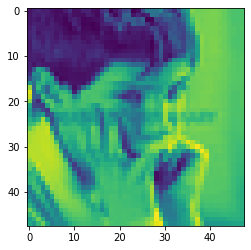

In [43]:
plt.imshow(np.array(train['pixels'][0].split(' ')).reshape(48,48).astype('float32'))

In [44]:
len(train['emotion'])

17010

## **Grabbing X an Y Data for train and test**

In [45]:
x_train = []

for i in range(len(train['emotion'])):
  x_train.append(np.array(train['pixels'][i].split(' ')).reshape(48,48,1).astype('float32'))

In [46]:
x_train = np.array(x_train)
x_train.shape

(17010, 48, 48, 1)

In [47]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [48]:
le = LabelEncoder()
y_train = le.fit_transform(train['emotion'])
y_train = np_utils.to_categorical(y_train)
y_train.shape

(17010, 3)

In [49]:
train.head()

,emotion,pixels
0,Sad,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
1,Neutral,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
2,Sad,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
3,Happy,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
4,Happy,85 84 90 121 101 102 133 153 153 169 177 189 1...


In [50]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [51]:
x_test = []

for i in range(len(test['emotion'])):
  x_test.append(np.array(test['pixels'][i].split(' ')).reshape(48,48,1).astype('float32'))

In [52]:
x_test = np.array(x_test)
x_test.shape

(4254, 48, 48, 1)

In [53]:
le = LabelEncoder()
y_test = le.fit_transform(test['emotion'])
y_test = np_utils.to_categorical(y_test)
y_test.shape

(4254, 3)

In [54]:
x_train = x_train/255
x_test = x_test/255

## **Building Model for Classification**

In [55]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, 5, padding='same', activation='elu', input_shape = (48,48,1)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(64, 5, padding='same', activation='elu'), 
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Dropout(0.3),

                                    tf.keras.layers.Conv2D(128, 3, padding='same', activation='elu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(128, 3, padding='same', activation='elu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Dropout(0.4),

                                    tf.keras.layers.Conv2D(256, 3, padding='same', activation='elu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(256, 3, padding='same', activation='elu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Dropout(0.5),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(128, activation='elu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.6),

                                    tf.keras.layers.Dense(128, activation='elu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.6),
                                   
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

In [57]:
from keras.preprocessing.image import ImageDataGenerator

In [58]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(x_train)

In [59]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)

In [60]:
model.compile(optimizer=optim,
              loss = 'categorical_crossentropy',
              metrics= ['accuracy'])

In [61]:
batch_size = 32
epochs =100

In [62]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [63]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [64]:
history = model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=batch_size),validation_data=(x_test, y_test),steps_per_epoch=len(x_train) / batch_size,epochs=epochs,
                              callbacks = callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
532/531 [==============================] - 10s 19ms/step - loss: 1.4271 - accuracy: 0.3808 - val_loss: 1.0623 - val_accuracy: 0.4473
Epoch 2/100
532/531 [==============================] - 10s 18ms/step - loss: 1.0938 - accuracy: 0.4187 - val_loss: 1.0209 - val_accuracy: 0.4850
Epoch 3/100
532/531 [==============================] - 10s 18ms/step - loss: 1.0321 - accuracy: 0.4686 - val_loss: 0.9499 - val_accuracy: 0.5179
Epoch 4/100
532/531 [==============================] - 10s 18ms/step - loss: 0.9441 - accuracy: 0.5348 - val_loss: 0.8202 - val_accuracy: 0.6119
Epoch 5/100
532/531 [==============================] - 10s 18ms/step - loss: 0.8503 - accuracy: 0.5885 - val_loss: 0.7471 - val_accuracy: 0.6716
Epoch 6/100
532/531 [==============================] - 10s 18ms/step - loss: 0.7928 - accuracy: 0.6268 - val_loss: 0.6791 - val_accuracy: 0.6888
Epoch 7/100
532/531 [==============================] -

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']

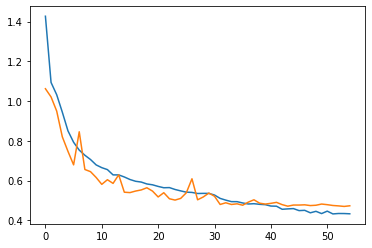

In [66]:
plt.plot(loss)
plt.plot(val_loss)

In [67]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

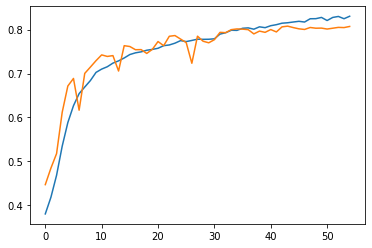

In [68]:
plt.plot(accuracy)
plt.plot(val_accuracy)

In [ ]:
model.save('/content/drive/My Drive/facial sentiment analysis/model.h5')

## **For Hyperparameter Tuning using Keras-Tuner**

In [69]:

from tensorflow import keras
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

def build_model(hp):
  model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(
                                        hp.Int('units',    
                                        min_value=32,
                                        max_value=128,
                                        step=32), 
                                        hp.Int('units',
                                        min_value=3,
                                        max_value=5,
                                        step=1),activation='relu',padding = 'same',input_shape=x_train[0].shape),
                                   


                                    tf.keras.layers.Conv2D(
                                        hp.Int('units',
                                        min_value=32,
                                        max_value=128,
                                        step=32), 
                                        hp.Int('units',
                                        min_value=3,
                                        max_value=5,
                                        step=1), activation='relu',padding = 'same'),
                                   
                                   
                                    tf.keras.layers.Conv2D(
                                        hp.Int('units',
                                        min_value=32,
                                        max_value=128,
                                        step=32), 
                                        hp.Int('units',
                                        min_value=3,
                                        max_value=5,
                                        step=1), activation='relu',padding = 'same'),


                                    tf.keras.layers.Flatten(),
                                   
                                   
                                    tf.keras.layers.Dense(
                                        hp.Int('units',
                                        min_value=32,
                                        max_value=128,
                                        step=32), activation='relu'),
                                  
                                    tf.keras.layers.Dense(10, activation='softmax'),
  ])

  model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
  
  return model




  tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='Facial Emotion Recognition',
    project_name='Facial_Emotion_Recognition')
  


    tuner.search(x_train, y_train,
             epochs=5,
             validation_data=(x_test, y_test))
    

IndentationError: ignored

## **Fill the Values and steps for testing of a model and then retrieve the best model among them**